In [142]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px 

In [143]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,MinMaxScaler,LabelEncoder,OneHotEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.cluster import KMeans 
from sklearn.linear_model import LinearRegression,LogisticRegression 
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score,accuracy_score,r2_score,mean_squared_error,confusion_matrix

In [144]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-5-hcv.csv')
data.head(1)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


In [145]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
data.duplicated().sum()

0

In [146]:
mis_values = data.isna().sum() * 100/len(data)
mis_values.sort_values(ascending=False)

ALP         2.926829
CHOL        1.626016
ALB         0.162602
ALT         0.162602
PROT        0.162602
Category    0.000000
Age         0.000000
Sex         0.000000
AST         0.000000
BIL         0.000000
CHE         0.000000
CREA        0.000000
GGT         0.000000
dtype: float64

In [147]:
mean_impute = SimpleImputer(missing_values=np.NaN, strategy='mean')
mis_vals = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']
data[mis_vals] = mean_impute.fit_transform(data[mis_vals])
data.isna().sum() * 100/len(data)

Category    0.0
Age         0.0
Sex         0.0
ALB         0.0
ALP         0.0
ALT         0.0
AST         0.0
BIL         0.0
CHE         0.0
CHOL        0.0
CREA        0.0
GGT         0.0
PROT        0.0
dtype: float64

In [148]:
# orig_val_category = data.Category
le = LabelEncoder()
y = data.Category 
true_labels = le.fit_transform(y)
data = pd.get_dummies(data,dtype=float)
data


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis,Sex_f,Sex_m
0,32,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,32,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0
611,64,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,64,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,46,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [149]:
data.corr()['CHOL'].sort_values(ascending=False)

CHOL                               1.000000
CHE                                0.420163
Category_0=Blood Donor             0.282894
PROT                               0.206546
ALB                                0.204803
Age                                0.123978
ALP                                0.121914
ALT                                0.068023
Sex_f                              0.029886
GGT                               -0.006828
Sex_m                             -0.029886
CREA                              -0.047667
Category_1=Hepatitis              -0.048278
Category_0s=suspect Blood Donor   -0.087620
Category_2=Fibrosis               -0.123247
BIL                               -0.156261
AST                               -0.207507
Category_3=Cirrhosis              -0.255977
Name: CHOL, dtype: float64

<AxesSubplot:title={'center':'Correlation Matrix'}>

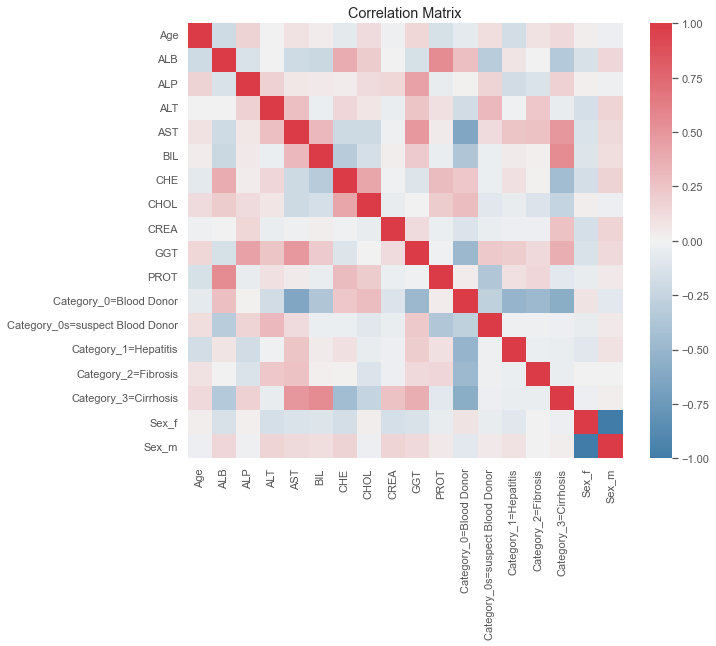

In [150]:
f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Correlation Matrix')

data_corr = data.corr()

sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_),cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,ax=ax)

In [151]:
le.classes_ 

n_cluster = len(le.classes_)

preprocessor = Pipeline( 
    [ 
        ('scaler',MinMaxScaler()),
        ('pca', PCA(n_components=2,random_state=42))
    ]
)

clusterer = Pipeline( 
    [ 
        ( 
            'kmeans',
            KMeans( 
                n_clusters=n_cluster,
                init = 'k-means++',
                n_init = 50,
                max_iter=500,
                random_state=42,
            )
        )
    ]
)
pipe = Pipeline( 
    [ 
        ('preprocessor',preprocessor),
        ('clusterer',clusterer)
    ]
)
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [152]:

preprocessed_data = pipe['preprocessor'].transform(data)
predicted_labels = pipe['clusterer']['kmeans'].labels_
silhouette_score(preprocessed_data,predicted_labels)

0.945683640137728

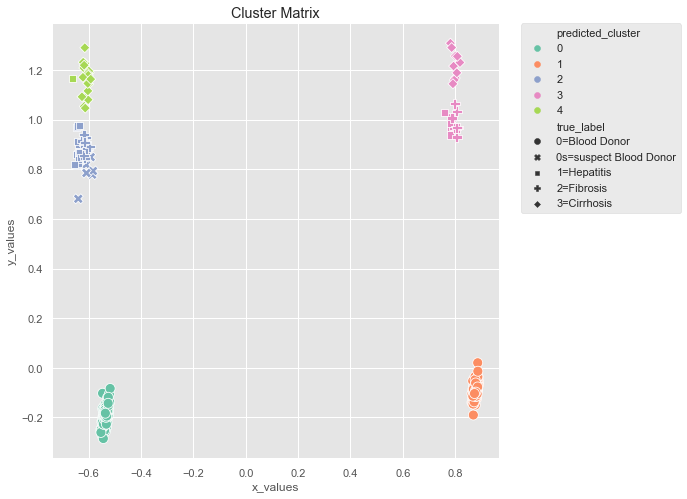

In [154]:
pcdaf = pd.DataFrame( 
    preprocessed_data,columns=['x_values','y_values']
)

pcdaf['predicted_cluster'] = predicted_labels 
pcdaf['true_label'] = le.inverse_transform(true_labels)

plt.figure(figsize=(8,8))
scat = sns.scatterplot( 
    x = 'x_values',
    y = 'y_values',
    data = pcdaf, 
    s = 100,
    hue = 'predicted_cluster',
    palette='Set2',
    style='true_label',
)

scat.set_title('Cluster Matrix')
plt.legend(bbox_to_anchor=(1.05,1), loc=2,borderaxespad=0.0)
plt.show()